## Setup

In [26]:
import os
import sys

# Get the absolute path of the project's root directory.
# os.getcwd() gets the current directory ('.../notebooks').
# os.path.join(..., '..') goes up one level.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

print(f'Project root \'{project_root}\' added to the sys.path.')

Project root 'C:\Users\chang\elaellet\project\robot_arm' added to the sys.path.


In [27]:
import gymnasium as gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import panda_gym
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

from src.utils import make_env, plot_environment

In [28]:
ENV_SPARSE_01 = 'PandaReachJoints-v3'
ENV_SPARSE_02 = 'PandaPushJoints-v3'
ENV_SPARSE_03 = 'PandaSlideJoints-v3'
ENV_SPARSE_04 = 'PandaPickAndPlaceJoints-v3'
ENV_SPARSE_05 = 'PandaStackJoints-v3'

ENV_DENSE_01 = 'PandaReachJointsDense-v3'
ENV_DENSE_02 = 'PandaPushJointsDense-v3'
ENV_DENSE_03 = 'PandaSlideJointsDense-v3'
ENV_DENSE_04 = 'PandaPickAndPlaceJointsDense-v3'
ENV_DENSE_05 = 'PandaStackJointsDense-v3'

In [29]:
print('--- Python Interpreter and Standard Library Versions ---')
print(f'- python: {sys.version}')
print(f'- python info: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

print('\n--- Third-Party Library Versions ---')
print(f'- gym: {gym.__version__}')
print(f'- matplotlib: {matplotlib.__version__}')
print(f'- numpy: {np.__version__}')
print(f'- panda_gym: {panda_gym.__version__}')

--- Python Interpreter and Standard Library Versions ---
- python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
- python info: 3.11.9

--- Third-Party Library Versions ---
- gym: 1.2.1
- matplotlib: 3.10.6
- numpy: 2.2.6
- panda_gym: 3.0.7


## Environment Exploration
-   **Task**
    * Moving either the gripper of one (or more) object(s) to a target position
    * Complete when the distance between the entity to move and the target position is less than 5 cm
    
-   **Action Space**
    * End-effector: Relative displacement (delta) of the gripper (3,)
    * Joints: Target velocity for each of Franka Emika Panda robot's rotational joints (7,)

-   **Observation Space**
    * All tasks: position/speed of the gripper (6,)
    * One or more objects: position/orientation/linear and rotational speed for each object (12,)
    * Gripper not constrained to be closed: opening of gripper (i.e., the distance between the fingers) (1,)

-  **Reward**
   * Sparse: 0 if the entity to move is at the desired position, -1 otherwise
   * Dense: Negative distance between the achieved position (the entity to move) and the desired position

In [45]:
vec_env = make_vec_env(ENV_DENSE_02, 1, 42) # make_env(ENV_DENSE_02, 1, 42)

In [46]:
robot_id = vec_env.envs[0].unwrapped.robot.sim._bodies_idx['panda']
env_id = vec_env.envs[0].spec.id

In [47]:
print(robot_id)
print(env_id)

0
PandaPushJointsDense-v3


In [48]:
action_space = vec_env.action_space
print(f'Action Space:        {action_space}')
print(f'Action Space Shape:  {action_space.shape}')
print(f'Action Space Sample: {action_space.sample()}')

Action Space:        Box(-1.0, 1.0, (7,), float32)
Action Space Shape:  (7,)
Action Space Sample: [ 0.5479121  -0.12224312  0.71719587  0.39473605 -0.8116453   0.9512447
  0.5222794 ]


In [49]:
obs_space = vec_env.observation_space

print(f'Observation Space Structure')
for key, space in obs_space.spaces.items():
    print(f'- \'{key}\': {space}') 

print(f'\nObservation Space Sample')
sample = obs_space.sample()
for key, value in sample.items():
    print(f'- \'{key}\': {value}')

Observation Space Structure
- 'achieved_goal': Box(-10.0, 10.0, (3,), float32)
- 'desired_goal': Box(-10.0, 10.0, (3,), float32)
- 'observation': Box(-10.0, 10.0, (18,), float32)

Observation Space Sample
- 'achieved_goal': [2.881946 5.878481 6.29831 ]
- 'desired_goal': [-1.0075294  5.1797585 -5.10373  ]
- 'observation': [-4.166031    1.4433943  -4.268757    4.766221    3.8532455  -4.2077703
 -0.73531103 -2.4042897  -0.8157775   2.4993641  -5.5821295  -9.977258
  8.25489    -2.7501497  -0.4881753  -7.7973905  -3.3187835   9.898823  ]


In [43]:
vec_env.seed(42)
vec_obs = vec_env.reset()

In [12]:
infos = vec_env.venv.venv.reset_infos
infos

[{'is_success': array(False)}]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]]

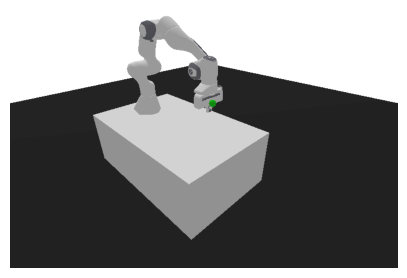

In [13]:
plot_environment(vec_env)

In [11]:
vec_env.close()